# Clustering

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
import sklearn.neighbors as nb
import sklearn.base as bs
import sklearn.metrics as mt
from mpl_toolkits.mplot3d import axes3d

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
data_df = pd.read_csv("data.csv", sep="\t", header=0, index_col="uid")
x = data_df.values
#print data_df
print  x
print data_df

[[  1.48108927e-01   8.32918243e-02   9.84527643e-01 ...,   3.88941510e-05
    2.13917830e-04   2.25586076e-03]
 [  2.46214593e-01   1.59762478e-01   9.19793814e-01 ...,   2.57681416e-04
    9.01884956e-04   2.02279912e-02]
 [  7.81360527e-01   5.36396702e-01   4.26791756e-02 ...,   8.61335531e-05
    6.02934872e-04   6.20161582e-03]
 ..., 
 [  4.52159942e-01   3.17983291e-01   6.92404224e-01 ...,   4.39203441e-04
    3.29402581e-03   3.46970718e-02]
 [  6.89523662e-01   6.66434187e-01   3.65726078e-02 ...,   3.11388742e-05
    1.86833245e-04   1.08986060e-03]
 [  1.78222495e-02   3.47533865e-02   6.88384387e-01 ...,   4.45556237e-04
    1.67083589e-03   9.35668099e-03]]
            followers_count  friends_count  statuses_count  favourites_count  \
uid                                                                            
40585382           0.148109       0.083292        0.984528          0.015305   
30005269           0.246215       0.159762        0.919794          0.016492   


In [3]:
def compute_distance(x):
    size = x.shape[0]
    distance = np.zeros((size, size))
    
    #compute distance between all points
    for i in range(size):
        #print "row: ", i
        for j in range(size):
            if i < j:
                dist = sqrt (sum((x[i] - x[j]) ** 2))
                distance[i, j] = dist
                distance[j, i] = dist
            
    return distance

distance = compute_distance(x)

In [4]:
print distance

[[ 0.          0.26135353  1.25655642 ...,  0.64068463  1.26555694
   0.77125194]
 [ 0.26135353  0.          1.14453656 ...,  0.40846461  1.16388914
   0.75809258]
 [ 1.25655642  1.14453656  0.         ...,  0.85690717  0.17053462
   1.19104535]
 ..., 
 [ 0.64068463  0.40846461  0.85690717 ...,  0.          0.89391464
   0.79085295]
 [ 1.26555694  1.16388914  0.17053462 ...,  0.89391464  0.          1.21646991]
 [ 0.77125194  0.75809258  1.19104535 ...,  0.79085295  1.21646991  0.        ]]


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего логина на портале Техносферы. При проверке домашнего задания бадут осуществляться проверка логина и соответствующего алгоритма.

In [5]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[hash("d.zlochevskaya") % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


In [40]:
#DBSCAN

class Clustering:
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, **kwargs):
        self.eps = kwargs['eps']
        self.min_pts = kwargs['min_pts']
        """
        Please add necessary algoritm parameters to class constructor.
        """
        return
        
    def fit(self, x, y=None):
        data_tree = nb.KDTree(x, leaf_size = 30,   #leaf is a default value
                                 metric='euclidean', **({}))   #default metric
        
        neighbors_of_pts = data_tree.query_radius(x, self.eps, return_distance=False)  #return indexes of neighbors
        cnt_neighbors_of_pts = [len(neighbors) for neighbors in neighbors_of_pts] # array of cnt_neighbors
        labels = -np.ones(x.shape[0], dtype=np.intp) #in begin all points is noise
        is_core = [cnt_neighbors_of_pts[i] >= self.min_pts for i in range(len(cnt_neighbors_of_pts))]
        
        claster_cnt = 0;
        stack = []
        
        for i in range(labels.shape[0]):
            if labels[i] != -1 or not is_core[i]:
                continue

            while True:
                if labels[i] == -1:
                    labels[i] = claster_cnt
                    if is_core[i]:
                        neighbors_arr = neighbors_of_pts[i]
                        for j in range(neighbors_arr.shape[0]):
                            point = neighbors_arr[j]
                            if labels[point] == -1:
                                stack.append(point)

                if len(stack) == 0:
                    break
                i = stack.pop()

            claster_cnt += 1
        
        self.core_indices = [i for i in range(len(is_core)) if is_core[i]]
        self.labels = labels
        self.cnt_clasters = claster_cnt
        """
        Use data matrix x to compute model parameters
        """
        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). 

<type 'numpy.ndarray'>


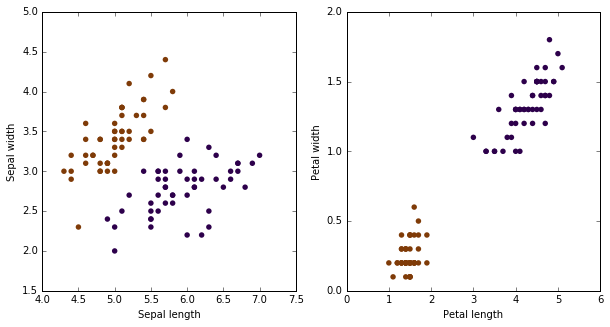

In [41]:
iris = ds.load_iris()

x_iris = iris.data[:100]
y_iris = iris.target[:100]
print type(x_iris)

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [42]:
pred_iris = Clustering(eps = 1.5, min_pts = 50).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

pred_iris = sc.DBSCAN(eps = 1.5, min_samples = 50).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00
Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [43]:
def mean_distance_in_clasters(distance_arr, labels, i):
    mask = labels == labels[i]
    mask[i] = False
    return np.mean(distance_arr[mask])

def mean_distance_to_nearest_claster(distance_arr, labels, i):
    b = [np.mean(distance_arr[labels == cur_label]) 
                for cur_label in set(labels) if cur_label != labels[i]]
    return np.min(b)


def quality(x, y, distance):
    """
    Implement quality criterion of your choice
    """
    labels = y;
    if len(set(labels)) == 1:
        return -1
    A = np.array([mean_distance_in_clasters(distance[i], labels, i) for i in range(len(labels))])
    B = np.array([mean_distance_to_nearest_claster(distance[i], labels, i) for i in range(len(labels))])
    silhouette_score = np.nanmean(((B - A) / np.maximum(A, B)))
    return silhouette_score

In [50]:
#нас интересует только случай, когда кол-во кластеров больше 2
#если eps < 0.07, то очень много шума 

i = 0.09
eps_arr = []
while i < 0.2:
    eps_arr.append(i)
    i = i + 0.02
min_pts_arr = [i for i in range(16, 29)]
criteria = np.zeros(len(eps_arr) * len(min_pts_arr))

print len(eps_arr)
print len(min_pts_arr)

x_ax = []
y_ax = []
cnt_plot = 0

for i,eps_ in enumerate(eps_arr):
    for j, min_pts_ in enumerate(min_pts_arr):
        cls = Clustering(eps = eps_, min_pts = min_pts_)
        y = cls.fit_predict(x)
        criteria[cnt_plot] = quality(x, y, distance)
        x_ax.append(eps_)
        y_ax.append(min_pts_)
        print "quality", criteria[cnt_plot], " eps = ", eps_, " min_pts = ", min_pts_, " cnt_claster = ", len(set(y))
        #if criteria[cnt_plot] != -1:
            #print "skilearn: ", mt.silhouette_score(x, y)
        cnt_plot += 1

6
13
quality 0.0346085562  eps =  0.09  min_pts =  16  cnt_claster =  10
quality 0.00626035026955  eps =  0.09  min_pts =  17  cnt_claster =  11
quality 0.0976260248319  eps =  0.09  min_pts =  18  cnt_claster =  9
quality 0.064162581138  eps =  0.09  min_pts =  19  cnt_claster =  11
quality 0.0738246179025  eps =  0.09  min_pts =  20  cnt_claster =  9
quality -0.0650394836587  eps =  0.09  min_pts =  21  cnt_claster =  7
quality -0.0549786508907  eps =  0.09  min_pts =  22  cnt_claster =  7
quality 0.140324959483  eps =  0.09  min_pts =  23  cnt_claster =  6
quality 0.135044533878  eps =  0.09  min_pts =  24  cnt_claster =  6
quality 0.22816305652  eps =  0.09  min_pts =  25  cnt_claster =  4
quality 0.191173920328  eps =  0.09  min_pts =  26  cnt_claster =  5
quality 0.188129271349  eps =  0.09  min_pts =  27  cnt_claster =  5
quality 0.184450459518  eps =  0.09  min_pts =  28  cnt_claster =  5
quality -0.0865369794881  eps =  0.11  min_pts =  16  cnt_claster =  5
quality 0.020810476

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE.

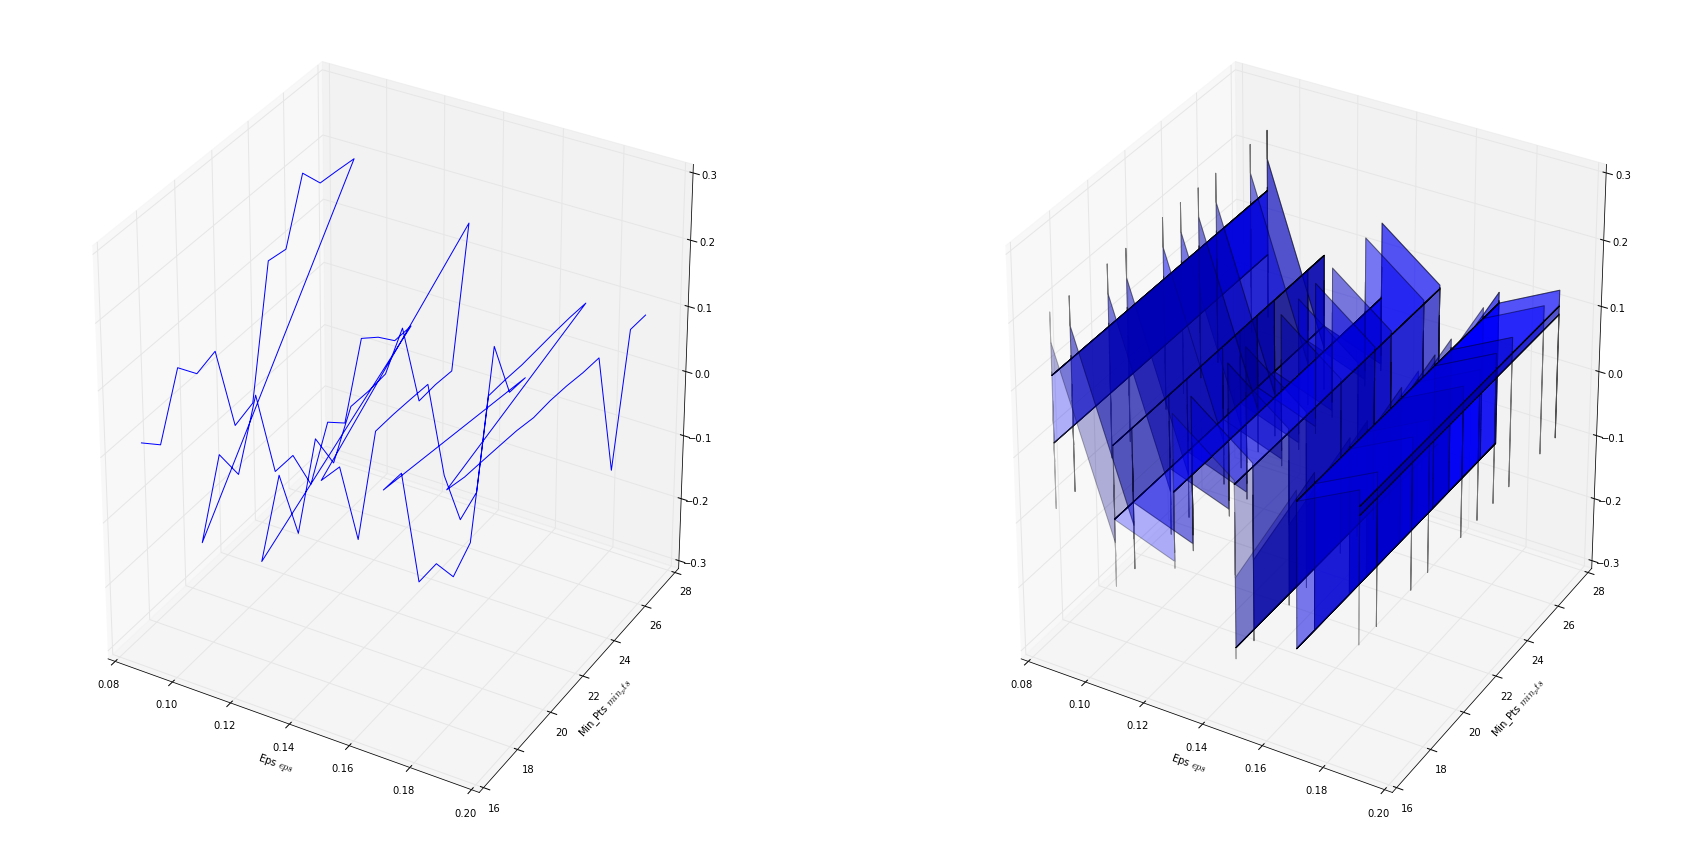

In [55]:
X, Y = np.meshgrid(x_ax, y_ax)
Z = criteria.reshape(-1, len(x_ax))

fig = pl.figure(figsize=(30, 15))
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(x_ax, y_ax, criteria)
pl.ylabel("Min_Pts $min_pts$")
pl.xlabel("Eps $eps$")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

pl.ylabel("Min_Pts $min_pts$")
pl.xlabel("Eps $eps$")
pl.grid()
pl.show()

In [95]:

cls = Clustering(eps = 0.09, min_pts = 22)
y = cls.fit_predict(x)
k = len(set(y))
print y
print set(y)
y = y + 1

#l = sc.DBSCAN(eps = 0.1, min_samples = 50).fit_predict(x)
#print set(l)

[ 0  0 -1 ..., -1 -1  0]
set([0, 1, 2, 3, 4, 5, -1])


In [82]:
tsne = sm.TSNE(n_components=2, verbose=1, n_iter=1000)
z = tsne.fit_transform(x)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 6887
[t-SNE] Computed conditional probabilities for sample 2000 / 6887
[t-SNE] Computed conditional probabilities for sample 3000 / 6887
[t-SNE] Computed conditional probabilities for sample 4000 / 6887
[t-SNE] Computed conditional probabilities for sample 5000 / 6887
[t-SNE] Computed conditional probabilities for sample 6000 / 6887
[t-SNE] Computed conditional probabilities for sample 6887 / 6887
[t-SNE] Mean sigma: 0.034702
[t-SNE] Error after 100 iterations with early exaggeration: 1.571505
[t-SNE] Error after 325 iterations: 1.448176


Визуализируем результаты кластеризации ([подсказка](http://anokhin.github.io/img/hw3_tsne-kmeans.png)). Можно ли сказать, что в двумерном пространстве объекты из одного кластера находятся недалеко? Какой вывод можно сделать о качестве кластеризации?

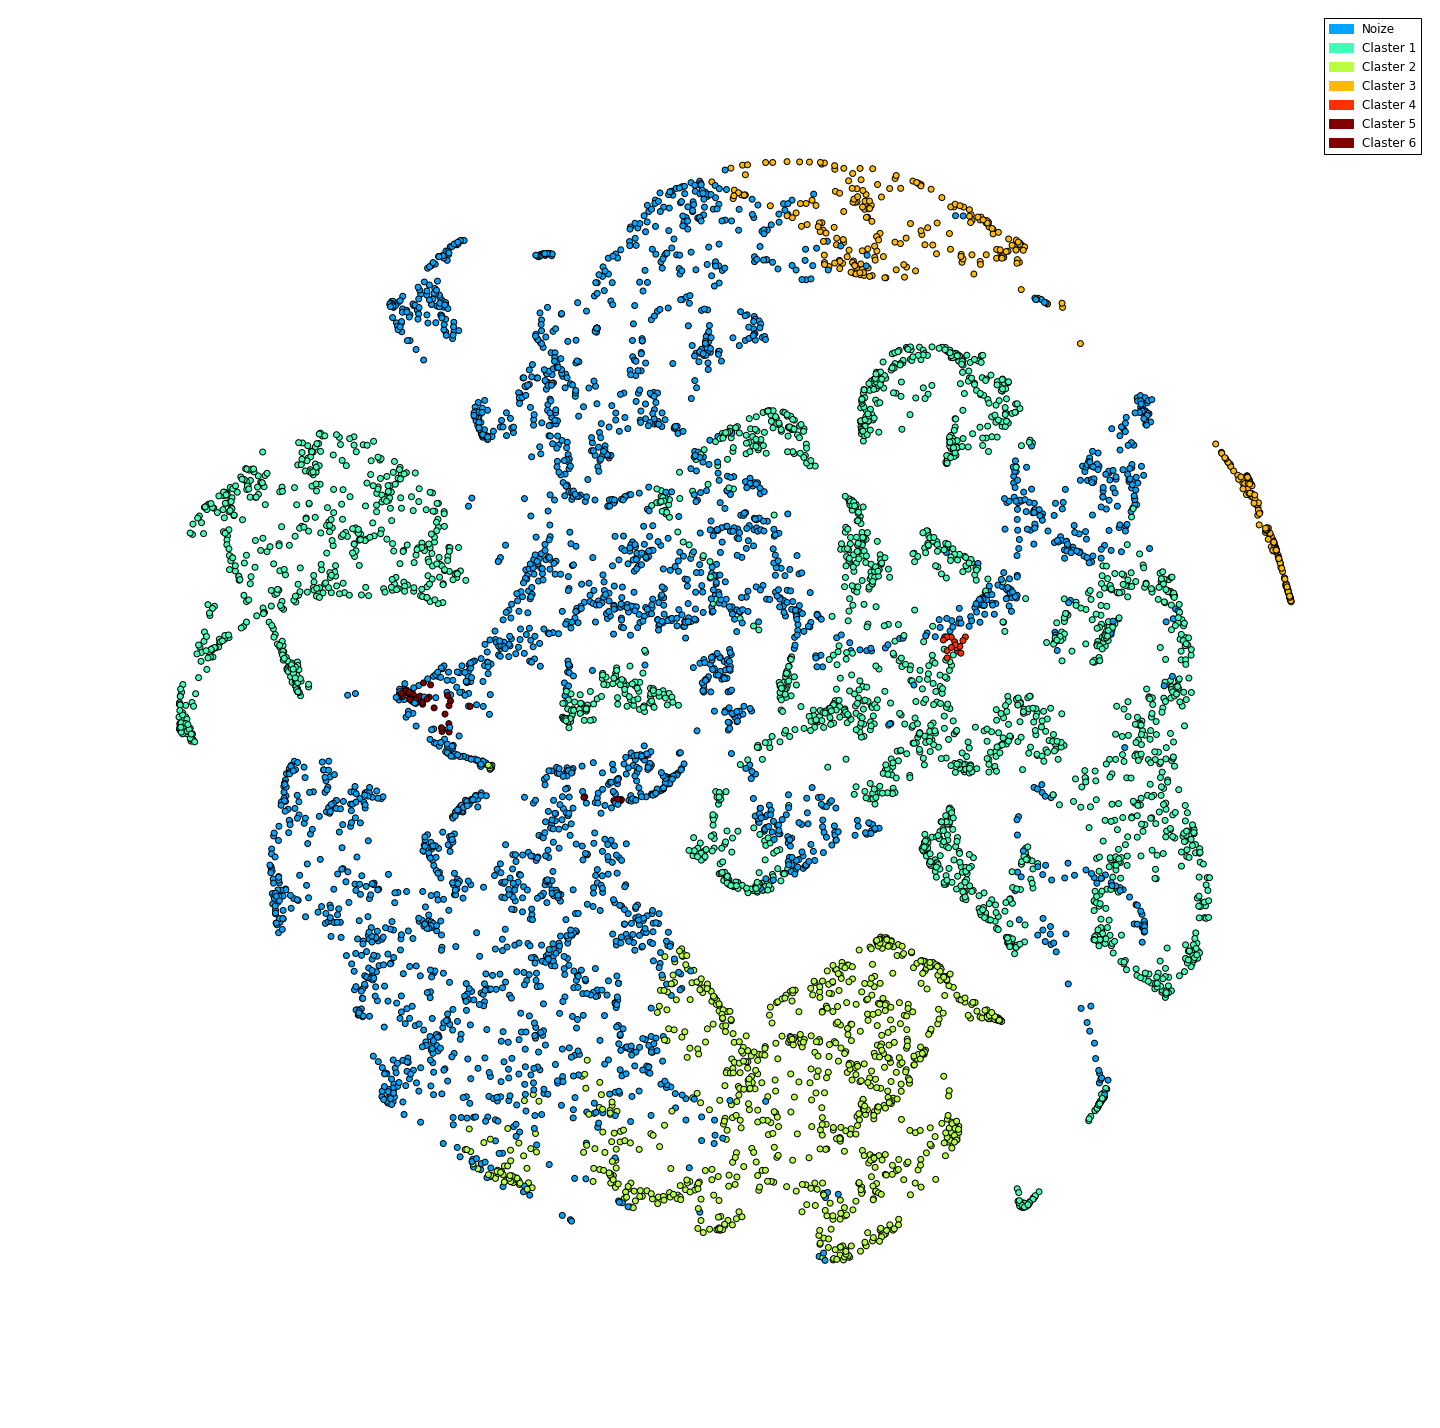

In [128]:
import matplotlib.patches as mpatches
# Color map
cm = pl.get_cmap('jet')
pl.figure(figsize=(25, 25))
pl.scatter(z[:, 0], z[:, 1], s=35,  c=map(lambda c: cm(((1.0* c + 2)) /k), y))
pl.axis('off')
patch_1 = mpatches.Patch(color=cm(((1.0* 0 + 2)) /k), label="Noize")
patch_2 = mpatches.Patch(color=cm(((1.0* 1 + 2)) /k), label="Claster 1")
patch_3 = mpatches.Patch(color=cm(((1.0* 2 + 2))/k), label="Claster 2")
patch_4 = mpatches.Patch(color=cm(((1.0* 3 + 2))/k), label="Claster 3")
patch_5 = mpatches.Patch(color=cm(((1.0* 4 + 2)) /k), label="Claster 4")
patch_6 = mpatches.Patch(color=cm(((1.0* 5 + 2)) /k), label="Claster 5")
patch_7 = mpatches.Patch(color=cm(((1.0* 6 + 2)) /k), label="Claster 6")
plt.legend(handles=[patch_1, patch_2, patch_3, patch_4 ,patch_5, patch_6, patch_7])
pl.show()

Попробуем проанализировать полученные кластеры. Для того, чтобы интерпретировать "суть" каждого из кластеров, построим [radar plot](http://www.wikiwand.com/en/Radar_chart), отображающий их центроиды. Посмотрите на графики и попробуйте объяснить, каким поведением можно охарактеризовать каждый из полученных кластеров? Есть ли среди кластеров похожие?

Реализация радара позаимствована отсюда: 
http://www.science-emergence.com/Matplotlib/MatplotlibGallery/RadarChartMatplotlibRougier/

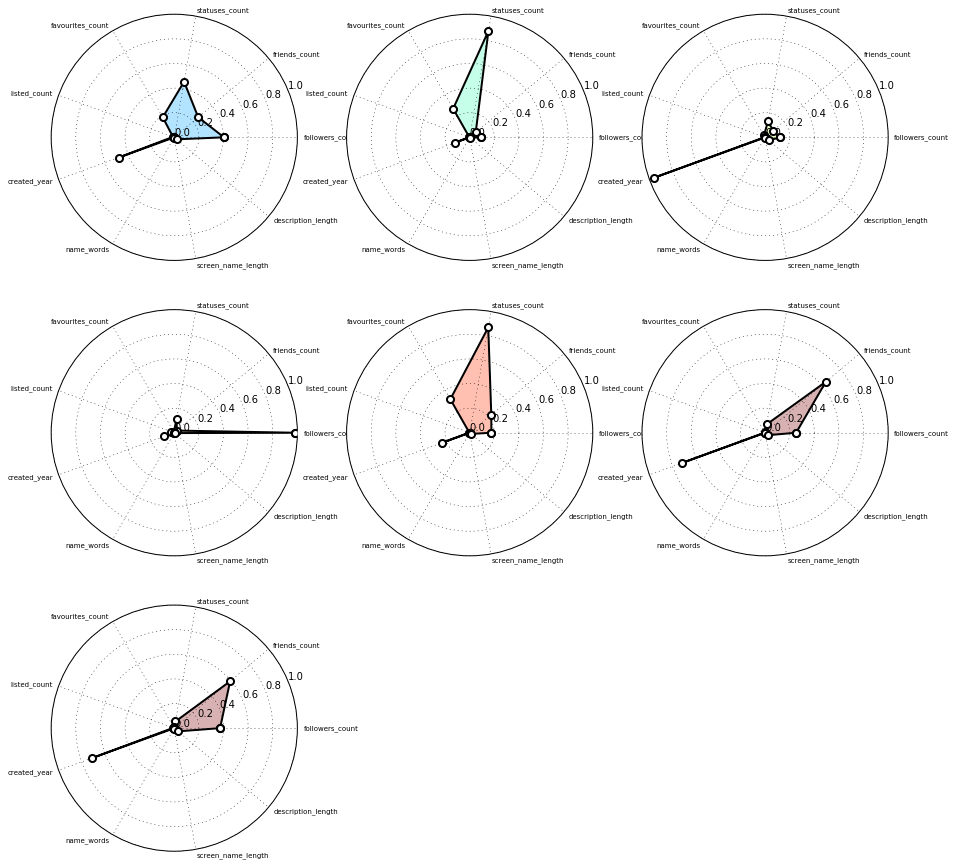

In [130]:
def radar(centroid, features, axes, color):
    # Set ticks to the number of features (in radians)
    t = np.arange(0, 2*np.pi, 2*np.pi/len(features))
    plt.xticks(t, [])

    # Set yticks from 0 to 1
    plt.yticks(np.linspace(0, 1, 6))

    # Draw polygon representing centroid
    points = [(x, y) for x, y in zip(t, centroid)]
    points.append(points[0])
    points = np.array(points)
    codes = [path.Path.MOVETO,] + [path.Path.LINETO,] * (len(centroid) - 1) + [ path.Path.CLOSEPOLY ]
    _path = path.Path(points, codes)
    _patch = patches.PathPatch(_path, fill=True, color=color, linewidth=0, alpha=.3)
    axes.add_patch(_patch)
    _patch = patches.PathPatch(_path, fill=False, linewidth = 2)
    axes.add_patch(_patch)

    # Draw circles at value points
    plt.scatter(points[:,0], points[:,1], linewidth=2, s=50, color='white', edgecolor='black', zorder=10)

    # Set axes limits
    plt.ylim(0, 1)

    # Draw ytick labels to make sure they fit properly
    for i in range(len(features)):
        angle_rad = i/float(len(features))*2*np.pi
        angle_deg = i/float(len(features))*360
        ha = "right"
        if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
        plt.text(angle_rad, 1.05, features[i], size=7, horizontalalignment=ha, verticalalignment="center")

# Some additiola imports
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')
# Make figure background the same colors as axes 
fig = plt.figure(figsize=(15, 15), facecolor='white')

cm = pl.get_cmap('jet')

clusters = np.unique(y)
for j, cluster in enumerate(clusters):    
    x_c = x[y == cluster]
    centroid = x_c.mean(axis=0)    
    # Use a polar axes
    axes = plt.subplot(3, 3, j + 1, polar=True)
    radar(centroid, data_df.columns.values, axes, cm((1.0* j + 2) / k))

plt.show()

In [ ]:
clusters = np.unique(y)
for j, cluster in enumerate(clusters):
    data_df_ = data_df.ix[y == claster]
    print "CLASTER ", i:
        